# 03 — Logistic Regression Model

This notebook implements a **Logistic Regression** model for drug usage classification.

**Goal**: Train, evaluate, and export a Logistic Regression model.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import os

plt.style.use('../style.mplstyle')

In [3]:
%load_ext watermark
%watermark -v -n -m -p numpy,pandas,sklearn,matplotlib,seaborn,joblib

Python implementation: CPython
Python version       : 3.12.12
IPython version      : 9.10.0

numpy     : 1.26.4
pandas    : 3.0.0
sklearn   : 1.8.0
matplotlib: 3.10.8
seaborn   : 0.13.2
joblib    : 1.5.3

Compiler    : Clang 17.0.0 (clang-1700.6.3.2)
OS          : Darwin
Release     : 25.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



## 1. Load Data

In [4]:
train_df = pd.read_csv('../data/processed/train.csv')
val_df = pd.read_csv('../data/processed/val.csv')
test_df = pd.read_csv('../data/processed/test.csv')

print(f"Train shape: {train_df.shape}")
print(f"Val shape:   {val_df.shape}")
print(f"Test shape:  {test_df.shape}")

# Handle any missing values in text (just in case)
train_df['text_clean'] = train_df['text_clean'].fillna('')
val_df['text_clean'] = val_df['text_clean'].fillna('')
test_df['text_clean'] = test_df['text_clean'].fillna('')

Train shape: (2100, 3)
Val shape:   (450, 3)
Test shape:  (450, 3)


## 2. Feature Extraction (TF-IDF)
We use `TfidfVectorizer` with n-grams (1, 2) to capture local context.

In [5]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train = vectorizer.fit_transform(train_df['text_clean'])
X_val = vectorizer.transform(val_df['text_clean'])
X_test = vectorizer.transform(test_df['text_clean'])

y_train = train_df['label']
y_val = val_df['label']
y_test = test_df['label']

print(f"Vocab size: {len(vectorizer.vocabulary_)}")

Vocab size: 5000


## 3. Training (Logistic Regression)

In [6]:
clf = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
clf.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

## 4. Evaluation

We evaluate on the **Test Set**.

In [7]:
y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.80      0.85      0.83       225
    POSITIVE       0.84      0.79      0.81       225

    accuracy                           0.82       450
   macro avg       0.82      0.82      0.82       450
weighted avg       0.82      0.82      0.82       450

Accuracy: 0.8200


### Confusion Matrix

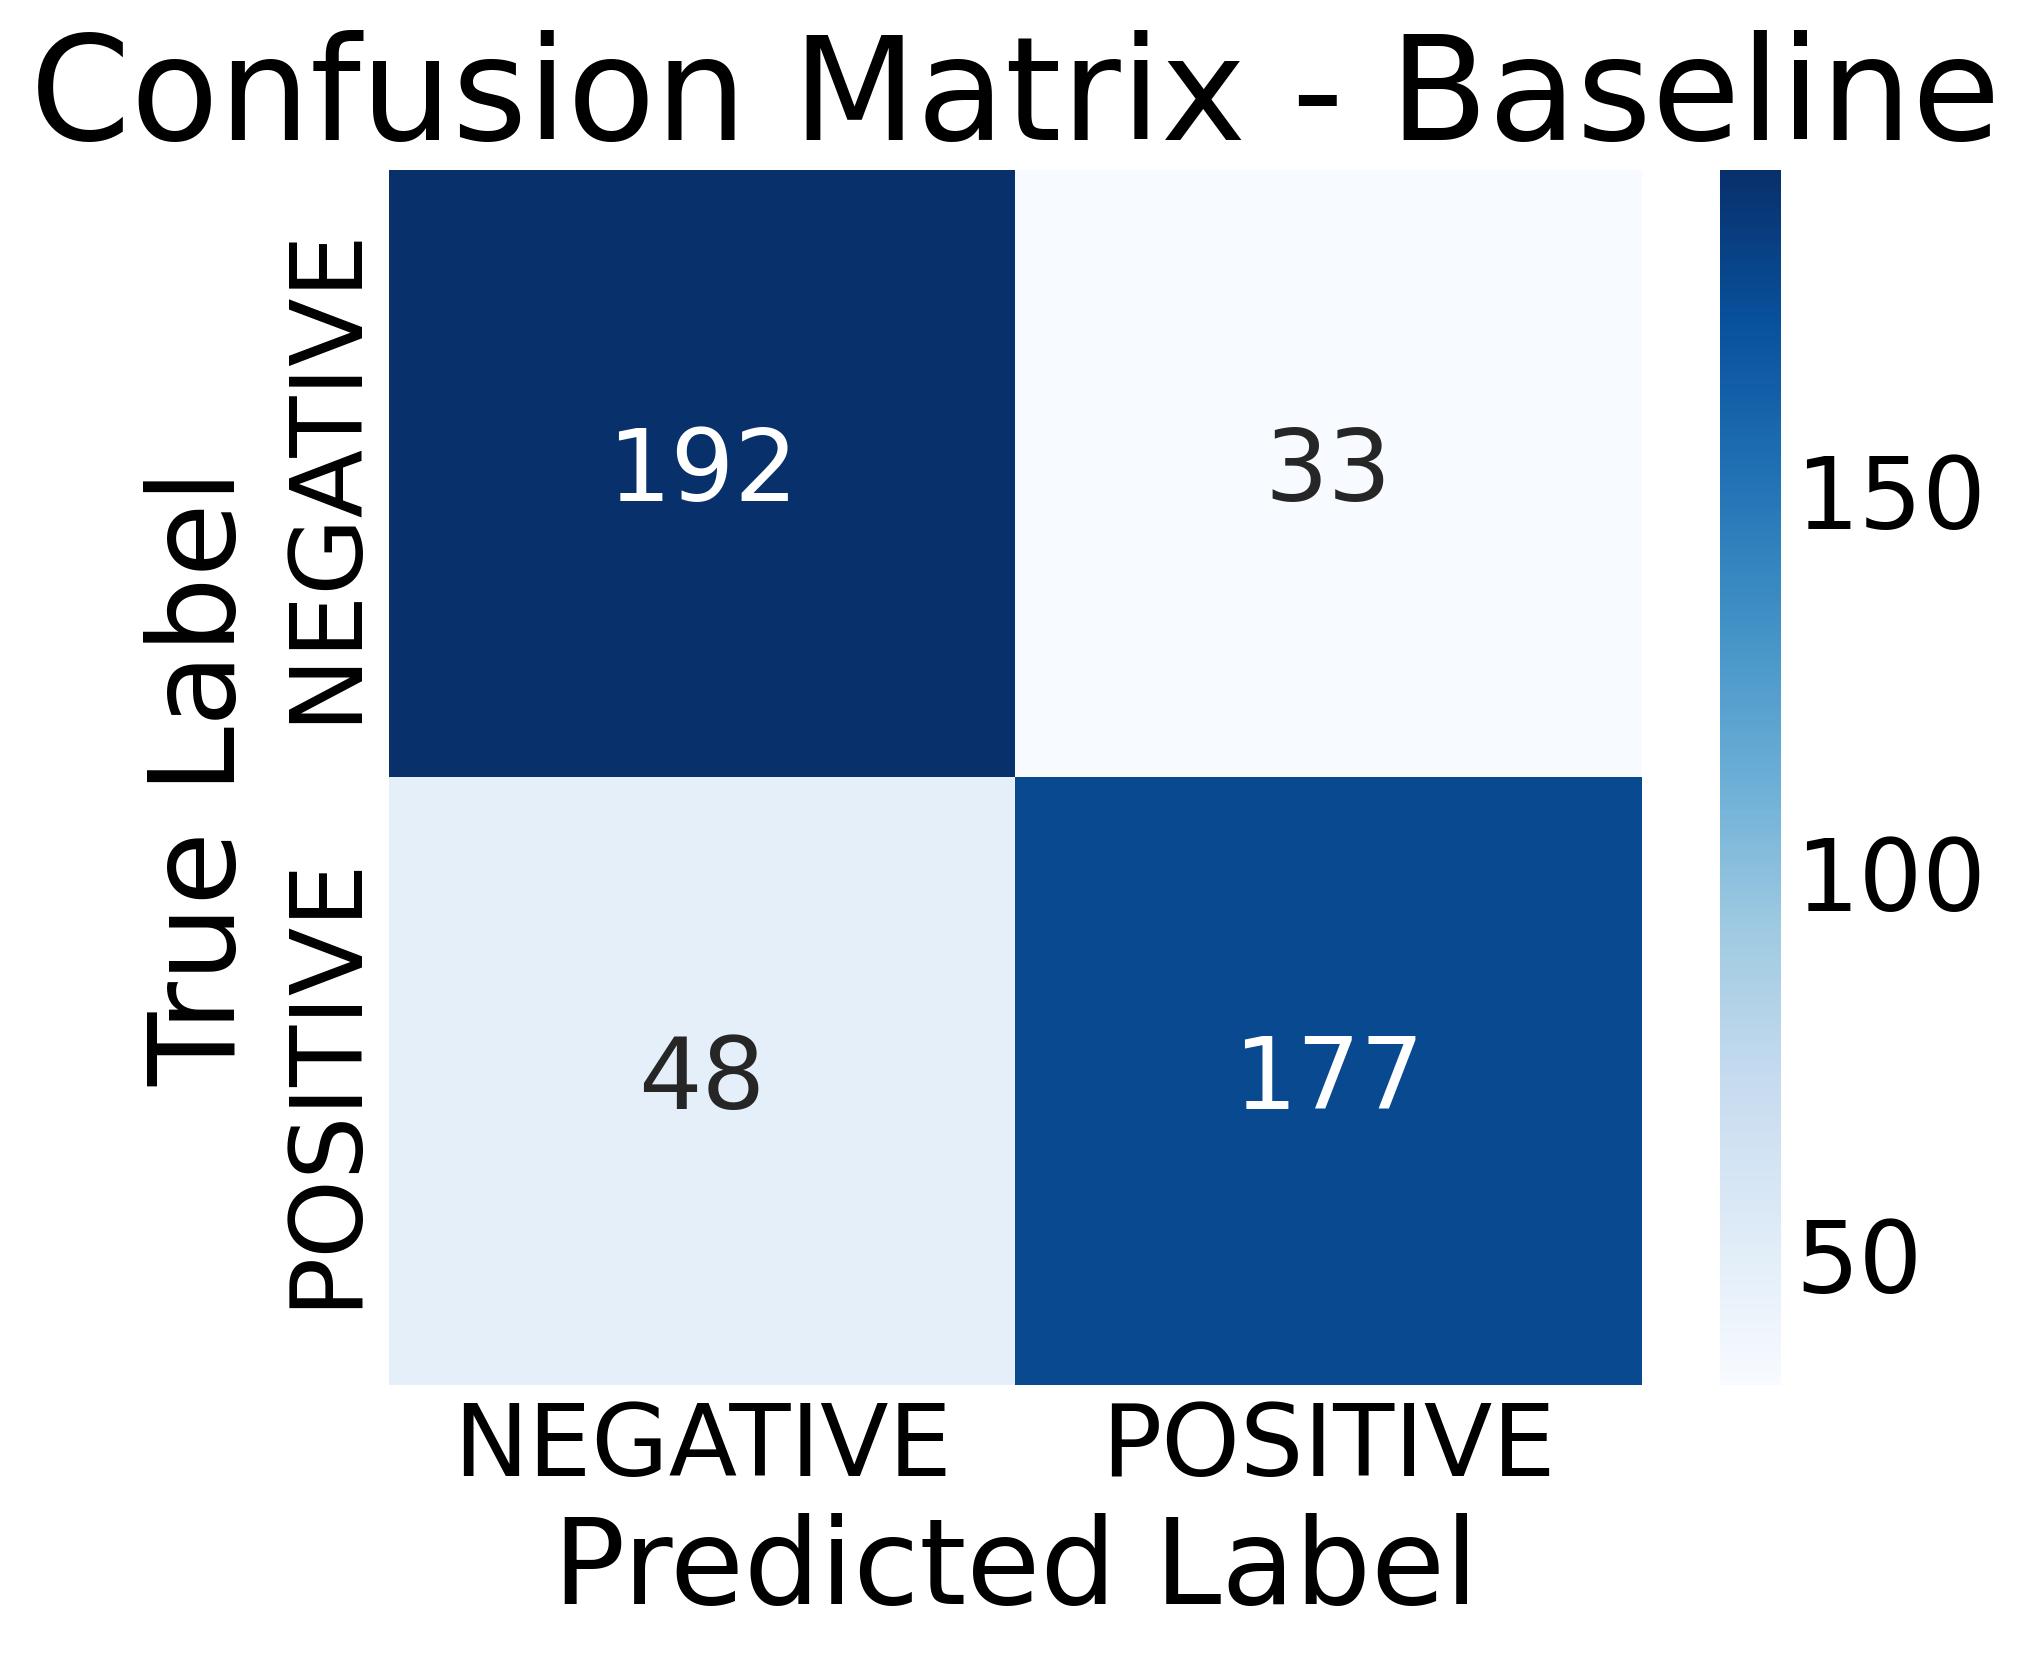

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Baseline')
plt.show()

## 5. Feature Importance
What words drive the prediction?

In [9]:
feature_names = vectorizer.get_feature_names_out()
coefs = clf.coef_[0]

# Top Positive features (Linked to POSITIVE class)
top_positive = sorted(zip(coefs, feature_names), reverse=True)[:10]
# Top Negative features (Linked to NEGATIVE class)
top_negative = sorted(zip(coefs, feature_names))[:10]

print("Top Predictors for POSITIVE class:")
for c, f in top_positive:
    print(f"{f}: {c:.4f}")

print("\nTop Predictors for NEGATIVE class:")
for c, f in top_negative:
    print(f"{f}: {c:.4f}")

Top Predictors for POSITIVE class:
quiero: 2.5941
porro: 2.1646
un porro: 2.0319
necesito: 1.9011
anatomia: 1.8397
ganas: 1.8293
ganas de: 1.7396
que ganas: 1.7159
fumarme: 1.5828
voy: 1.5180

Top Predictors for NEGATIVE class:
que: -3.1053
se: -2.9837
no necesito: -2.8165
de: -2.2187
no: -1.7519
en: -1.5459
dan: -1.4446
persona: -1.4353
me dan: -1.3854
dan ganas: -1.3632


## 6. Model Export
Saving the trained model and vectorizer for reuse.

In [10]:
# Ensure models directory exists
os.makedirs('../models/logistic_regression', exist_ok=True)\n

# Save model and vectorizer
joblib.dump(clf, '../models/logistic_regression/model.joblib')
joblib.dump(vectorizer, '../models/logistic_regression/vectorizer.joblib')

print("Model saved to ../models/logistic_regression_model.joblib")
print("Vectorizer saved to ../models/tfidf_vectorizer_logistic.joblib")

Model saved to ../models/logistic_regression_model.joblib
Vectorizer saved to ../models/tfidf_vectorizer_logistic.joblib


## Summary

This baseline model uses TF-IDF and Logistic Regression.
Key metrics and top features are displayed above.
The model artifacts have been saved to the `models/` directory.